In [1]:
"""
In this program it will be created new features from the features we already have using Internet Advertisements dataset
Creating new features may seen unnucessary and to have no clear benefit but some algorithms struggle when features correlate significantly, or if there are redundant features.
For this reason it will be created new features.
"""

import os
import numpy as np
import pandas as pd
data_folder = os.path.join(os.path.expanduser('~'), 'OneDrive\Desktop\Pace\CS619\Chapter05\Data')
data_filename = os.path.join(data_folder, 'ad.data')

In [2]:
# Reading dataset and checking it
ads = pd.read_csv(data_filename, header=None)
ads.head(10)

c:\users\rmart\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3050: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [3]:
# Defining a function that converts number to a float and if that fails, it returns NumPy's special NaN value
def convert_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

In [4]:
# Creating a dictionary for the conversion
converters = {}
for i in range(1558):    # 1558 is the last column
    converters[i] = convert_number

In [5]:
# Setting column 1558, the class, to a binary feature
converters[1558] = lambda x: 1 if x.strip() == 'ad.' else 0

In [6]:
# Reloading dataset with those changes
ads = pd.read_csv(data_filename, header=None, converters=converters)
ads.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,57.0,468.0,8.2105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,33.0,230.0,6.9696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,59.0,460.0,7.7966,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,60.0,234.0,3.9000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
# Extracting the x and y data for the classification algorithm, and dropping any row with NaN value
# The x matrix will be all of the columns except the last which will be the y array
ads.dropna(inplace=True)
X = ads.drop(1558, axis=1).values
y = ads[1558]

In [8]:
# Using Principal Component Analysis (PCA) algorithm to find combinations of features that describe dataset in less information
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
Xd = pca.fit_transform(X)
print(Xd)    # This result in a matrix with just five features

[[-2.49520677e+01  6.36819879e+01  5.80033572e-01 -3.95000120e-01
   4.71407634e-01]
 [ 3.10427322e+02 -3.53831962e+01 -4.80553605e+00  4.90605915e-03
  -5.31339357e-01]
 [ 7.12696153e+01 -3.76349302e+01 -4.20057800e-01 -4.77612191e-01
  -5.02962116e-01]
 ...
 [-1.22175648e+01  3.84283033e+01 -4.67764090e-01 -2.64737514e-01
  -1.99031863e-01]
 [-3.91951832e+01 -3.75298619e+01  5.00448824e-01 -7.62727004e-01
  -1.44514013e-01]
 [-1.17377831e+02 -1.31772372e+01 -6.62378566e-01  1.66574388e+00
   5.37864127e-02]]


In [9]:
# Let's look at the amount of variance that is explained by each of these features
np.set_printoptions(precision=3, suppress=True)
pca.explained_variance_ratio_

array([0.854, 0.145, 0.001, 0.   , 0.   ])

In [10]:
# Using PCA to improve the performance in classification tasks
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=14)
scores_reduced = cross_val_score(clf, Xd, y, scoring='accuracy')
print(f'PCA score: {scores_reduced.mean():.4f}')

PCA score: 0.9364


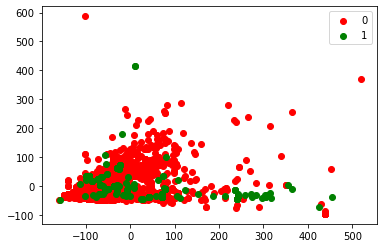

In [11]:
# Plotting dataset to show the result of PCA transformation
%matplotlib inline
from matplotlib import pyplot as plt

classes = set(y)    # Get all of distinct classes (there are only two: true (is ad) or false (not ad))
colors = ['red', 'green']    # Assign colors to each class

for cur_class, color in zip(classes, colors):
    # Iterate over both lists (classes and colors)
    mask = (y == cur_class)
    plt.scatter(Xd[mask,0], Xd[mask,1], marker='o', color=color, label=int(cur_class))

plt.legend()
plt.show()

In [12]:
# Implementing a Transformer by creating a class and two method for:
# Get the mean for each feature in the fit method
# Return which values are more than the mean for a given feature in the transform method
from sklearn.base import TransformerMixin
from sklearn.utils import as_float_array

class MeanDiscrete(TransformerMixin):
    def fit(self, X, y=None):
        X = as_float_array(X)
        self.mean = X.mean(axis=0)
        return self
    
    def transform(self, X, y=None):
        X = as_float_array(X)
        assert X.shape[1] == self.mean.shape[0]
        return X > self.mean

In [13]:
mean_discrete = MeanDiscrete()
X_mean = mean_discrete.fit_transform(X)

In [14]:
# Putting the transformer into action
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('mean_discrete', MeanDiscrete()), ('classifier', DecisionTreeClassifier(random_state=14))])
scores_mean_discrete = cross_val_score(pipeline, X, y, scoring='accuracy')
print(f'Mean Discrete performance: {scores_mean_discrete.mean():.3f}')

Mean Discrete performance: 0.939
